#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
plt.style.use('fivethirtyeight')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

#### Importing Datasets

In [2]:
df_train = pd.read_csv('./data/trainprevloans_new.csv')
df_test = pd.read_csv('./data/testprevloans_new.csv')

In [3]:
df_train.head() #print the first five rows of the dataset

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,closeddate,referredby,Convert_creationdate,Convert_approved_date,Convert_firstduedate,Convert_firstrepaiddate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,Status
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,10000,13000.0,30,06:48.0,No_referee,8/15/2016 17:22,8/15/2016 18:22,9/14/2016 0:00,9/1/2016 15:51,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate,48,0
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,10000,13000.0,30,44:49.0,No_referee,4/28/2017 17:38,4/28/2017 18:39,5/30/2017 0:00,5/26/2017 0:00,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate,48,0
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,20000,23800.0,30,18:56.0,No_referee,3/5/2017 9:56,3/5/2017 10:56,4/4/2017 0:00,4/26/2017 22:03,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate,48,1
3,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,20000,24500.0,30,24:06.0,No_referee,6/1/2017 12:34,6/1/2017 13:34,7/3/2017 0:00,6/25/2017 15:13,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate,48,0
4,8a2a81a74ce8c05d014cfb32a0da1049,301954468,11,20000,24500.0,30,14:36.0,No_referee,6/28/2017 9:58,6/28/2017 10:58,7/31/2017 0:00,7/25/2017 8:04,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate,48,0


#### Data Exploration

In [4]:
df_train.info() #detailed information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13693 entries, 0 to 13692
Data columns (total 20 columns):
customerid                    13693 non-null object
systemloanid                  13693 non-null int64
loannumber                    13693 non-null int64
loanamount                    13693 non-null int64
totaldue                      13693 non-null float64
termdays                      13693 non-null int64
closeddate                    13693 non-null object
referredby                    13693 non-null object
Convert_creationdate          13693 non-null object
Convert_approved_date         13693 non-null object
Convert_firstduedate          13693 non-null object
Convert_firstrepaiddate       13693 non-null object
bank_account_type             13693 non-null object
longitude_gps                 13693 non-null float64
latitude_gps                  13693 non-null float64
bank_name_clients             13693 non-null object
employment_status_clients     13693 non-null object
level_of

In [5]:
df_train.describe() #descriptive statistics for the numerical features

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps,Age,Status
count,1.369300e+04,13693.000000,13693.000000,13693.000000,13693.000000,13693.000000,13693.000000,13693.000000,13693.000000
mean,3.018395e+08,4.200760,16566.347769,19646.612269,26.742131,4.482207,7.291442,34.955233,0.361353
std,9.304690e+04,3.269552,9375.687619,10512.238823,10.997624,8.639590,3.436232,6.133220,0.480410
min,3.016001e+08,1.000000,3000.000000,3900.000000,15.000000,-118.247009,-33.868818,23.000000,0.000000
25%,3.017767e+08,2.000000,10000.000000,11500.000000,15.000000,3.354793,6.471885,31.000000,0.000000
50%,3.018545e+08,3.000000,10000.000000,13000.000000,30.000000,3.576022,6.617633,34.000000,0.000000
75%,3.019193e+08,6.000000,20000.000000,24500.000000,30.000000,6.364658,7.421333,39.000000,1.000000
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069,58.000000,1.000000


In [6]:
df_train.describe(include=[np.object, pd.Categorical]) #descriptive statistics for the categorical features

,customerid,closeddate,referredby,Convert_creationdate,Convert_approved_date,Convert_firstduedate,Convert_firstrepaiddate,bank_account_type,bank_name_clients,employment_status_clients,level_of_education_clients
count,13693,13693,13693,13693,13693,13693,13693,13693,13693,13693,13693
unique,3264,3506,408,13350,13304,363,13069,3,18,7,5
top,8a858f7d5578012a01557ea194d94948,05:34.0,No_referee,6/16/2017 14:23,12/5/2016 12:36,7/3/2017 0:00,12/7/2016 9:36,Savings,GT Bank,Permanent,Unknow
freq,26,14,12891,3,4,304,9,8311,5034,9138,10229


In [7]:
print('shape before removing duplicate rows:', df_train.shape)
df_train.drop_duplicates()
print('shape after removing duplicate rows:', df_train.shape)

shape before removing duplicate rows: (13693, 20)
shape after removing duplicate rows: (13693, 20)


In [8]:
## check for number of missing values
df_train.isnull().sum() #there are no missing values in the dataset

customerid                    0
systemloanid                  0
loannumber                    0
loanamount                    0
totaldue                      0
termdays                      0
closeddate                    0
referredby                    0
Convert_creationdate          0
Convert_approved_date         0
Convert_firstduedate          0
Convert_firstrepaiddate       0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Age                           0
Status                        0
dtype: int64

In [9]:
## correlation of the target feature with the other numerical features
df_train.corr()['Status'] # the loan number and loanamount have almost the same correlation.Hence, the loan number will be dropped for prediciton of status

systemloanid    -0.043794
loannumber       0.007144
loanamount       0.007081
totaldue         0.014194
termdays         0.064210
longitude_gps   -0.003616
latitude_gps    -0.013345
Age             -0.002689
Status           1.000000
Name: Status, dtype: float64

In [10]:
## checking for categories
cat_col = ['termdays', 'Status', 'bank_account_type',
       'bank_name_clients', 'employment_status_clients','level_of_education_clients']
for cat in cat_col:
    print('Number of unique {}'.format(cat),df_train[cat].nunique())

Number of unique termdays 4
Number of unique Status 2
Number of unique bank_account_type 3
Number of unique bank_name_clients 18
Number of unique employment_status_clients 7
Number of unique level_of_education_clients 5


In [11]:
# unique features from each category
unique_cat_col = ['termdays', 'Status', 'bank_account_type',
       'bank_name_clients', 'employment_status_clients','level_of_education_clients']
for cat in unique_cat_col:
    print(df_train[cat].unique())

[30 15 60 90]
[0 1]
['Other' 'Savings' 'Current']
['Diamond Bank' 'EcoBank' 'First Bank' 'GT Bank' 'UBA' 'Union Bank' 'FCMB'
 'Access Bank' 'Zenith Bank' 'Fidelity Bank' 'Stanbic IBTC' 'Skye Bank'
 'Sterling Bank' 'Wema Bank' 'Keystone Bank' 'Unity Bank' 'Heritage Bank'
 'Standard Chartered']
['Permanent' 'Unknown' 'Self-Employed' 'Student' 'Unemployed' 'Retired'
 'Contract']
['Post-Graduate' 'Unknow' 'Primary' 'Graduate' 'Secondary']


In [12]:
#count the unique values in each category
cols = ['termdays', 'Status', 'bank_account_type',
       'bank_name_clients', 'employment_status_clients','level_of_education_clients']
for col in cols:
    print(df_train[col].value_counts())
    print()

30    8318
15    4590
60     762
90      23
Name: termdays, dtype: int64

0    8745
1    4948
Name: Status, dtype: int64

Savings    8311
Other      5228
Current     154
Name: bank_account_type, dtype: int64

GT Bank               5034
First Bank            1932
Access Bank           1270
UBA                   1126
Diamond Bank           983
Zenith Bank            948
Stanbic IBTC           489
EcoBank                450
FCMB                   420
Skye Bank              272
Fidelity Bank          267
Sterling Bank          112
Wema Bank               88
Heritage Bank           87
Keystone Bank           83
Union Bank              74
Standard Chartered      44
Unity Bank              14
Name: bank_name_clients, dtype: int64

Permanent        9138
Self-Employed    2319
Unknown          1363
Student           615
Unemployed        219
Retired            29
Contract           10
Name: employment_status_clients, dtype: int64

Unknow           10229
Graduate          2508
Secondary          

#### Feature Engineering

In [13]:
#regroup features to eliminate some of the outliers and avoid biasness in prediction
education_level = {'Unknow':'Unknown', 'Primary':'Unknown'}
employment_status = {'Student':'Other','Unemployed':'Other','Retired':'Other','Contract':'Other'}
term_days = {60:'>30', 90:'>30'}
account_type = {'Other':'Other', 'Current':'Other'}
bank_name = {'Wema Bank':'Other', 'Heritage Bank':'Other', 'Keystone Bank':'Other','Standard Chartered':'Other',
             'Unity Bank':'Other', 'Union Bank':'Other', 'Sterling Bank':'Other'}
datasets=[df_train, df_test]
for dataset in datasets:
    dataset['termdays']=dataset['termdays'].replace(term_days)
    dataset['bank_account_type']=dataset['bank_account_type'].replace(account_type)
    dataset['bank_name_clients'] = dataset['bank_name_clients'].replace(bank_name)
    dataset['level_of_education_clients'] = dataset['level_of_education_clients'].replace(education_level)
    dataset['employment_status_clients'] = dataset['employment_status_clients'].replace(employment_status)

#### Visualization

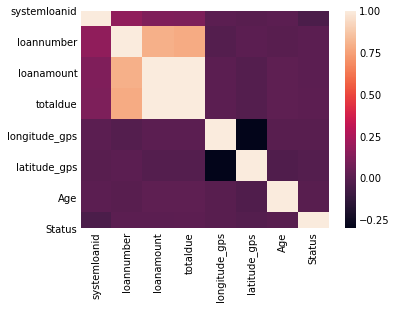

In [14]:
#Heatmap to show the relationnship among the numerical features
corrmat= df_train.corr()
f, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

Not Defaulted    0.638647
Defaulted        0.361353
Name: Status, dtype: float64


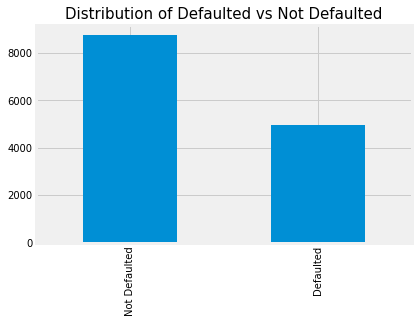

In [15]:
# check to see if the data is normally distributed
promoted_or_not = {1:'Defaulted', 0:'Not Defaulted'}
df_train['Status']=df_train['Status'].replace(promoted_or_not)

print(df_train['Status'].value_counts(normalize=True))
df_train['Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Defaulted vs Not Defaulted', fontsize=15)
plt.show() #From the result shown below, the accuracy we want to improve is approximately 0.64, i.e. 64%

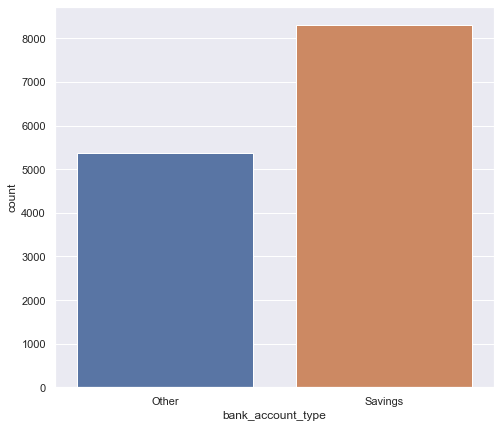

In [16]:
#analyse term days
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x= 'bank_account_type', data = df_train)

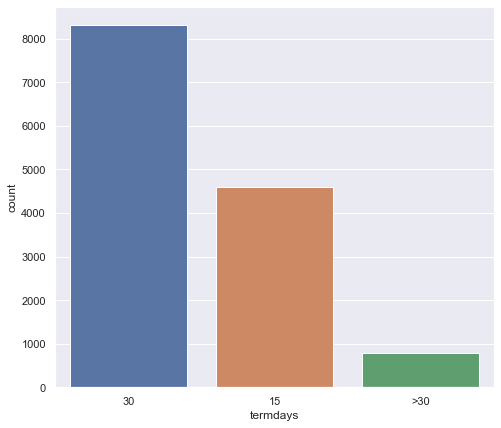

In [17]:
#analyse term days
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x= 'termdays', data = df_train)

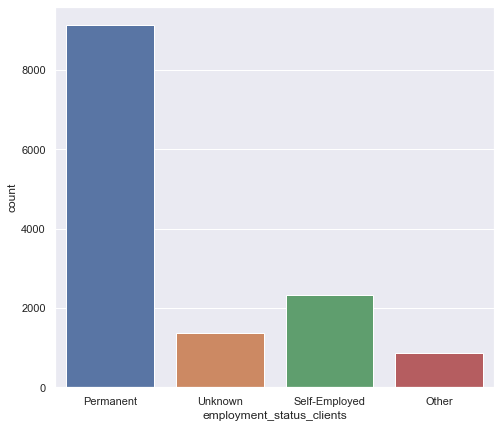

In [18]:
#analyse employment status clients
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x= 'employment_status_clients', data = df_train)

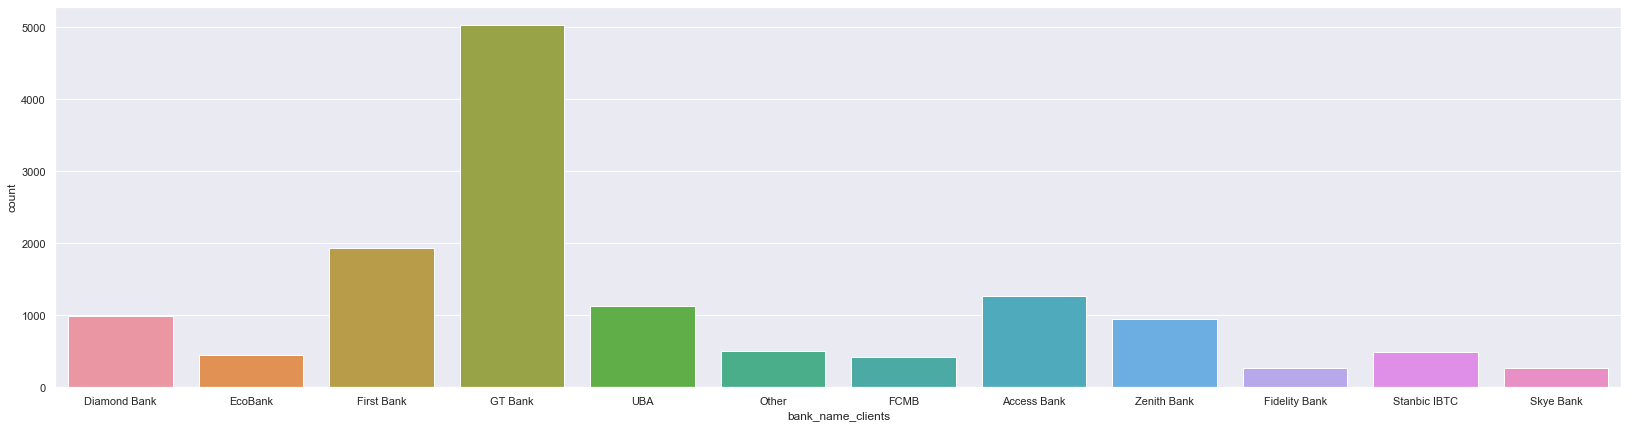

In [19]:
#analyse bank name of clients
sns.set(rc={'figure.figsize':(25,7)})
sns.countplot(x= 'bank_name_clients', data = df_train)

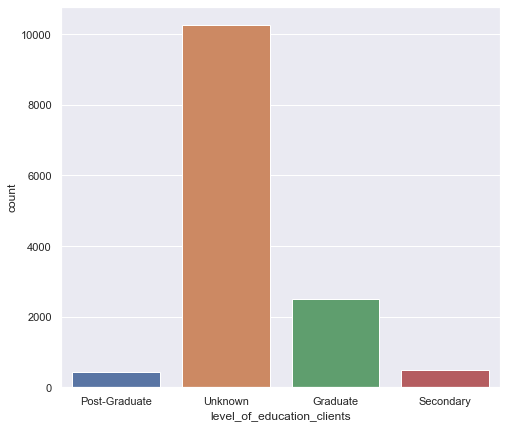

In [20]:
#analyse educational background
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x= 'level_of_education_clients', data = df_train)

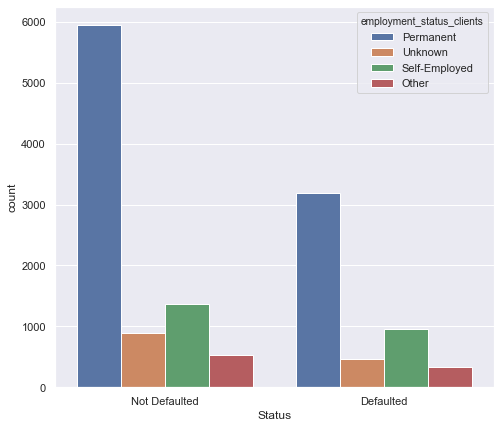

In [21]:
#default based on level employment_status_clients
sns.countplot(x='Status', hue='employment_status_clients', data=df_train)

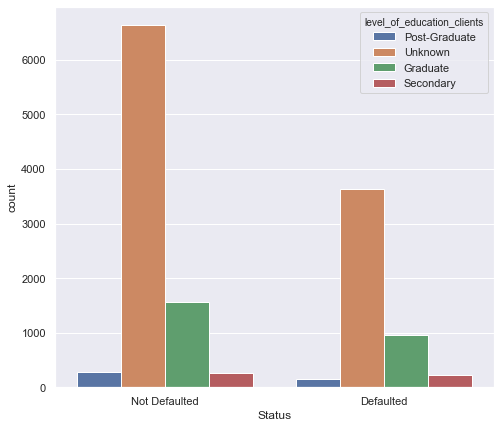

In [22]:
#default based on level of education of clients
sns.countplot(x='Status', hue='level_of_education_clients', data=df_train)

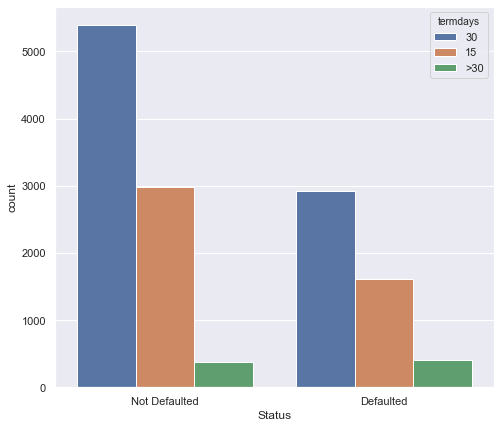

In [23]:
#default based on termdays of loan
sns.countplot(x='Status', hue='termdays', data=df_train)

In [24]:
# convert the status strings back to boolean values i.e. 1 and 0
promoted_or_not = {'Defaulted':1, 'Not Defaulted':0}
df_train['Status']=df_train['Status'].replace(promoted_or_not)

In [25]:
df_train.columns

Index(['customerid', 'systemloanid', 'loannumber', 'loanamount', 'totaldue',
       'termdays', 'closeddate', 'referredby', 'Convert_creationdate',
       'Convert_approved_date', 'Convert_firstduedate',
       'Convert_firstrepaiddate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Age', 'Status'],
      dtype='object')

In [26]:
'''The following features were not considered because they have very small impact in predicting the status of a customer.
These include: 'customerid', 'systemloanid', 'Convert_creationdate',
       'Convert_approved_date', 'Convert_firstduedate',
       'Convert_firstrepaiddate', 'longitude_gps',
       'latitude_gps'
'''
train_cols = ['loanamount', 'totaldue', 'termdays', 'referredby',
           'bank_account_type', 'bank_name_clients', 'employment_status_clients',
           'level_of_education_clients', 'Age','Status']
test_cols = ['loanamount', 'totaldue', 'termdays','referredby',
           'bank_account_type', 'bank_name_clients', 'employment_status_clients',
           'level_of_education_clients', 'Age']
train_data = df_train[train_cols]
test_data = df_test[test_cols]

In [27]:
train_data.sample(5) #select 5 rows randomly

,loanamount,totaldue,termdays,referredby,bank_account_type,bank_name_clients,employment_status_clients,level_of_education_clients,Age,Status
6977,30000,36800.0,>30,No_referee,Savings,Diamond Bank,Permanent,Graduate,39,0
10987,10000,13000.0,30,No_referee,Savings,GT Bank,Unknown,Unknown,39,0
9565,20000,24500.0,30,No_referee,Savings,GT Bank,Permanent,Unknown,40,0
4830,10000,11500.0,15,No_referee,Savings,UBA,Permanent,Unknown,39,1
9649,10000,13000.0,30,No_referee,Other,Diamond Bank,Permanent,Graduate,33,1


In [28]:
## dummify the categorical features
cols = ['termdays', 'referredby', 'bank_account_type', 'bank_name_clients', 
        'employment_status_clients', 'level_of_education_clients']
train = pd.get_dummies(train_data, columns =cols, prefix_sep='__', drop_first=True)  # the seperator between the prefix (column name) and cell value
test = pd.get_dummies(test_data, columns =cols, prefix_sep='__', drop_first=True)  # the seperator between the prefix (column name) and cell value

In [29]:
'''correlation of the target feature with all the features. This is now possible since all categorical 
features have been converted to numerical values
'''
train.corr()['Status'] # the loan number and loanamount have almost the same correlation

loanamount                                   0.007081
totaldue                                     0.014194
Age                                         -0.002689
Status                                       1.000000
termdays__30                                -0.025755
                                               ...   
employment_status_clients__Self-Employed     0.046216
employment_status_clients__Unknown          -0.011437
level_of_education_clients__Post-Graduate   -0.007098
level_of_education_clients__Secondary        0.040090
level_of_education_clients__Unknown         -0.029226
Name: Status, Length: 431, dtype: float64

In [30]:
# create Array for the Features and Target variables
x1 = train.drop('Status', axis=1).values 
y1 = train['Status'].values

### Trying out Model Validation Techniques

In [31]:
#import needed libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.linear_model import LogisticRegression

#### Holdout Validation Approach - Train and Test Set Split

In [32]:
# Evaluate using a train and a test set
X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.30, random_state=100)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 63.32%


#### K-fold Cross-Validation


In [33]:
kfold = KFold(n_splits=10, random_state=100)
model_kfold = LogisticRegression()
results_kfold = cross_val_score(model_kfold, x1, y1, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 63.89%


#### Stratified K-fold Cross-Validation


In [34]:
skfold = StratifiedKFold(n_splits=3, random_state=100)
model_skfold = LogisticRegression()
results_skfold = cross_val_score(model_skfold, x1, y1, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 63.90%


#### Repeated Random Test-Train Splits


In [35]:
kfold2 = ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LogisticRegression()
results_4 = cross_val_score(model_shufflecv, x1, y1, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

Accuracy: 63.87% (0.45%)


Conclusion
We have applied various model validation techniques using scikit-learn. 
The mean accuracy result for the various techniques is summarised below:

Holdout Validation Approach: Accuracy of 63.32%
K-fold Cross-Validation: Mean Accuracy of 63.89%
Stratified K-fold Cross-Validation: Mean Accuracy of 63.90%
Repeated Random Test-Train Splits: Mean Accuracy of 63.87%
We can conclude that the cross-validation technique improves the performance of the model 
and is a better model validation strategy. The model can be further improved by doing 
exploratory data analysis, data pre-processing, feature engineering, or trying out other 
machine learning algorithms instead of the logistic regression algorithm we built in this guide.